# 전체 웹툰 댓글 키워드 분석

## 데이터 준비 및 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from multiprocessing import freeze_support
from collections import Counter

In [10]:
data = pd.read_csv('comment_all.csv', encoding='utf-8-sig', engine='python')

In [12]:
data.head()

,Unnamed: 0,comment,webtoon_name,webtoon_num
0,0,인생존망 재밌었다👍 재미 없었다👎,인생존망,733766
1,1,워싱 칭따오,인생존망,733766
2,2,이제 시즌2 가시죠,인생존망,733766
3,3,수수고고하하셨셨습습니니다다,인생존망,733766
4,4,형 난 다 읽었는데 나만 다 읽은거 아니징..?,인생존망,733766


In [13]:
# Unnamed: 0  열 제거
del data['Unnamed: 0']

In [14]:
data.head()

,comment,webtoon_name,webtoon_num
0,인생존망 재밌었다👍 재미 없었다👎,인생존망,733766
1,워싱 칭따오,인생존망,733766
2,이제 시즌2 가시죠,인생존망,733766
3,수수고고하하셨셨습습니니다다,인생존망,733766
4,형 난 다 읽었는데 나만 다 읽은거 아니징..?,인생존망,733766


In [15]:
print('댓글 개수 : ',len(data))

댓글 개수 :  79951


In [16]:
# data에서 중복인 것 찾기
data['comment'].nunique()

76040

In [17]:
# 중복된 값 제거
data.drop_duplicates(subset=['comment'], inplace=True)
print('댓글 개수 : ',len(data))

댓글 개수 :  76040


In [20]:
# 한글 문자 이외의 문자는 공백으로 변환
import re
data['comment'] = data['comment'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ",x))

In [21]:
data.head()

,comment,webtoon_name,webtoon_num
0,인생존망 재밌었다 재미 없었다,인생존망,733766
1,워싱 칭따오,인생존망,733766
2,이제 시즌 가시죠,인생존망,733766
3,수수고고하하셨셨습습니니다다,인생존망,733766
4,형 난 다 읽었는데 나만 다 읽은거 아니징,인생존망,733766


In [27]:
# 빈칸을 null값으로 설정
data['comment'].replace(' ', np.nan, inplace=True)

In [28]:
# null값 위치 확인
data.loc[data.comment.isnull()] 

,comment,webtoon_name,webtoon_num
212,NaN,인생존망,733766
5207,NaN,윈드브레이커,602910
5212,NaN,윈드브레이커,602910
6015,NaN,윈드브레이커,602910
8809,NaN,윈드브레이커,602910
9752,NaN,윈드브레이커,602910
9779,NaN,윈드브레이커,602910
11916,NaN,소녀의 세계,654774
12481,NaN,소녀의 세계,654774
14813,NaN,여신강림,703846


In [29]:
# null값이 존재하는 행 제거
data = data.dropna(how='any')

In [30]:
# null값 위치 확인
data.loc[data.comment.isnull()] 

,comment,webtoon_name,webtoon_num


## =========================================

## 명사만 추출하기

In [31]:
okt = Okt()

In [33]:
# comment에서 품사 정보를 부착하여 반환
pos_comment = []
for comment in data['comment']:
    pos_temp = okt.pos(comment, norm=True, stem=True) #okt의 pos 함수를 이용하여 품사 추출
    pos_comment.append(pos_temp)
    
print(pos_comment[3]) # 출력된 결과에서 Noun이 명사

[('수', 'Modifier'), ('수', 'Modifier'), ('고고', 'Noun'), ('하', 'Suffix'), ('하다', 'Verb'), ('습습', 'Noun'), ('니니', 'Noun'), ('다다', 'Noun')]


In [34]:
# 추출된 품사가 있는 리스트에서 명사만 추출해서 리스트로 만들기
noun_comment = []
for item in pos_comment:
    for word, pos in item:
        if pos == 'Noun': # 추출된 품사 리스트에서 Noun에 해당하는 값만 명사리스트에 저장
            noun_comment.append(word)
            
print(noun_comment[:100])

['인생', '존망', '재미', '워싱', '칭따오', '이제', '시즌', '가시', '고고', '습습', '니니', '다다', '형', '난', '나', '징', '형', '미안', '글', '나', '왜', '아무', '언급', '안', '할머니', '글러브', '값', '어간', '게', '생활비', '거', '마음', '아픔', '다행', '진짜', '동수', '사과', '동수', '놈', '이', '실제', '작가', '일', '실제', '일', '각색', '스토리', '진짜', '충격', '개', '정색', '함', '작가', '화이팅', '혹시', '저', '동수', '사람', '땜', '최동수', '놈', '건가', '후기', '작가', '둘', '성격', '차이', '태준', '이형', '돈', '시즌', '여기', '댓글', '빙빙', '왜', '그', '쭉', '박태준', '작가', '웹툰', '대한', '열정', '땐', '일진', '생각', '웹툰작가', '로서', '이유', '시즌', '볼', '사람', '사람', '인생', '존망', '완결', '축하', '시즌', '핑크', '맨', '스폰지']


In [52]:
# 명사 리스트에서 빈도수를 확인해서 탑 30개만 추출 
# 자주 사용하는 명사 중에서 특정 명사 제거하기위한 리스트
stopwords = ['이제','습습', '니니', '난', '나', '나', '아무', '안', '게', '거', '진짜', '놈', '이', '개','혹시', '저','땜', '놈','그냥']
count = Counter(noun_comment)
return_contents = []
return_count = []

stop_flag = True
# 빈도수가 가장 높은 30개 추출
for n, c in count.most_common(30):  
    temp = {'tag': n, 'count': c}
    for stopword in stopwords :
        # 불용어가 존재하면 
        if (stopword == n) : 
            stop_flag = False 
            break
    #불용어가 포함되어 있지 않으면
    if (stop_flag == True):
        if len(n) > 1: #글자 수가 1 이상인 명사만 추출
            return_contents.append(n)
            return_count.append(c)
            
    stop_flag =True

print(return_contents)
print(return_count)

['작가', '사람', '생각', '웹툰', '지금', '보고', '친구', '자기', '베댓', '모리']
[7026, 6349, 4961, 2748, 2619, 2592, 2509, 2489, 2470, 2292]


## ========================================
# 시각화
## 댓글 키워드 빈도수에 따른 막대 그래프

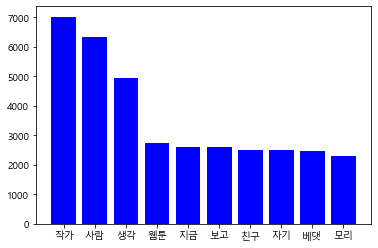

In [53]:
# 키워드 빈도수에 따른 막대 그래프 만들기
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) #한글 사용을 위해 => 그냥 사용시 한글이 꺠짐

x = np.arange(len(return_contents))

plt.bar(x, return_count, color ='blue', width = 0.8)
plt.xticks(x, return_contents)
plt.show()

##  댓글 키워드 빈도수에 따른 워드 클라우드

In [54]:
str_noun_words = ','.join(noun_comment)
FONT_PATH = 'C:/Windows/Fonts/malgun.ttf'

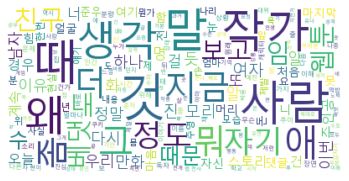

In [55]:
wordcloud = WordCloud(collocation_threshold =30, max_font_size=60, stopwords=stopwords, background_color="white", font_path=FONT_PATH).generate(str_noun_words)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear') # 가장 간단한 방법인 bilinear(Nearest는 화질이 떨어짐)
plt.axis("off")
plt.show()